In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199



In [43]:
application_train = pd.read_csv('application_train.csv')
application_test= pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
installments_payments = pd.read_csv('installments_payments.csv')

Representasi tiap data:

1.aplication: main data yg di split yg train ada targetnya, yg test tidk ada 

2.bureau: kredit klien sebelumnya yg dilaporkan ke biro kredit berisi info2 seperti credit active dll

3.bureau balance : masih berhubungan berisi status dan balance

4.credit_card_balance: history dari tiap bulan dari applicant yg berhubungan dgn pinjaman

5.POS_CASH_balance: history dari Point of sales balance dan loans ke homecredit

6.previous_application: history dari applikasi sebelumnya di homecredit

7.installments_payments  : history dari pembayaran

In [44]:
print(application_train.shape[1])
print(application_train.shape[0])

122
307511


In [45]:
#sebuah function untuk mencari kategorikal fitur

def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print('-----'*40)
    print("numerical_features:",numerical_features)

In [46]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [47]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    
    #ms= ms[ms["Percent"] > 0]
    return ms

In [48]:
missingdata(application_test)

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


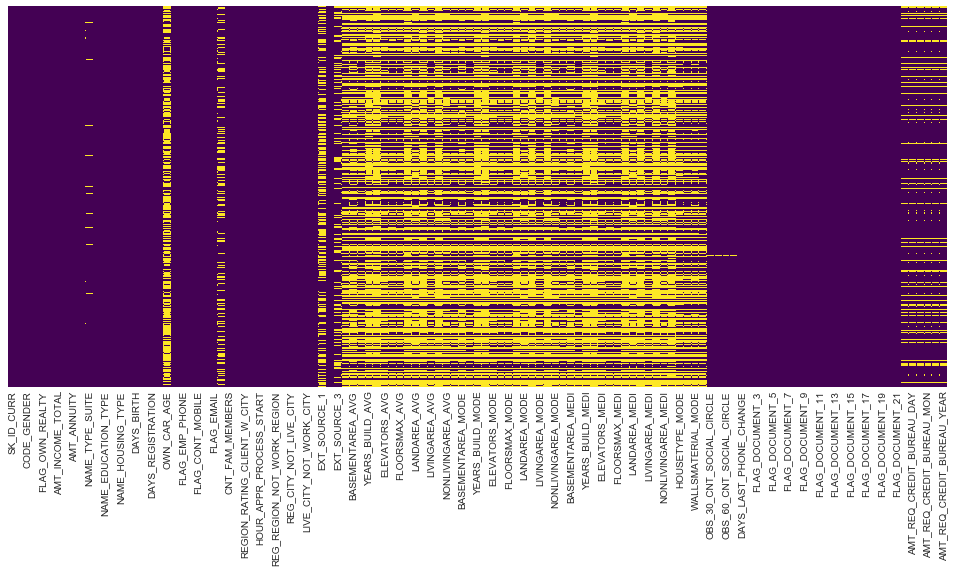

In [49]:
plt.figure(figsize=(15, 7))
sns.heatmap(application_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')


,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


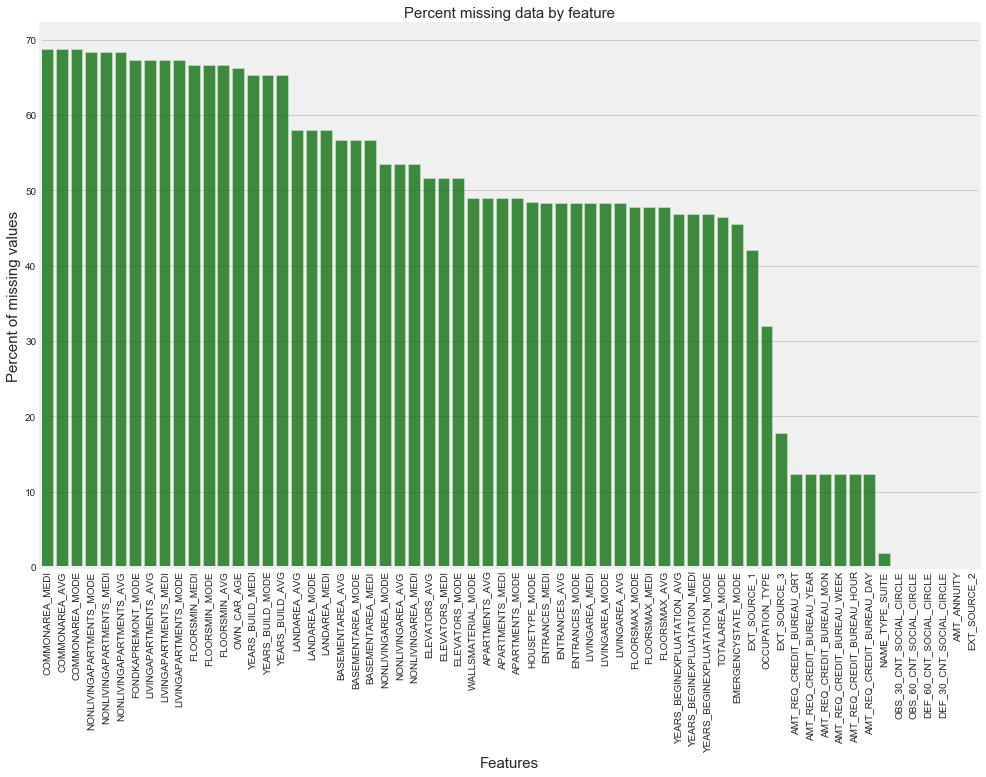

In [50]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(15,10))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    #ms= ms[ms["Percent"] > 0]
    return ms

missingdata(application_test) #bisa juga dimasukan dengan dataframe2 diatas

In [51]:
type_features(application_train)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_

In [52]:
type_features(application_test)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_

In [53]:
type_features(bureau)

categorical_features : Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')


In [54]:
type_features(bureau_balance)

categorical_features : Index(['STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_BUREAU', 'MONTHS_BALANCE'], dtype='object')


In [55]:
type_features(POS_CASH_balance)

categorical_features : Index(['NAME_CONTRACT_STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


In [56]:
type_features(credit_card_balance)

categorical_features : Index(['NAME_CONTRACT_STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


In [57]:
type_features(previous_application)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYME

Explore dari application

In [58]:
application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

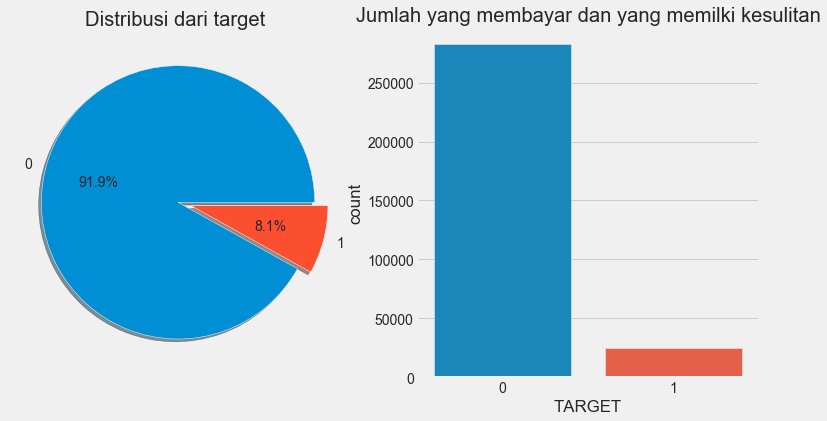

In [116]:
f,ax=plt.subplots(1,2,figsize=(12,6))
application_train.TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribusi dari target ')
ax[0].set_ylabel('')
sns.countplot('TARGET',data=application_train,ax=ax[1])
ax[1].set_title('Jumlah yang membayar dan yang memilki kesulitan')
plt.show()


Penjelasan : terdapat 8.1% target di value = 1 artinya 8,1% dari total distribusi memiliki kesulitan dalam membayar sedangkan sisanya adalah case yang lain

In [60]:
def plot(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(14,6))
    df[[t1,t2]].groupby([t1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('Jumlah kostumer berdasarkan _'+t1)
    sns.countplot(t1,hue=t2,data=df,ax=ax[1],palette="seismic") # melakukan count berdasarkan tipe edukasi dan bayar/tidaknya
    ax[1].set_title('grouping berdasarkan ' +t1 +' mengacu pada target  ')
    plt.xticks(rotation=-90)
    a=plt.show()
    return a

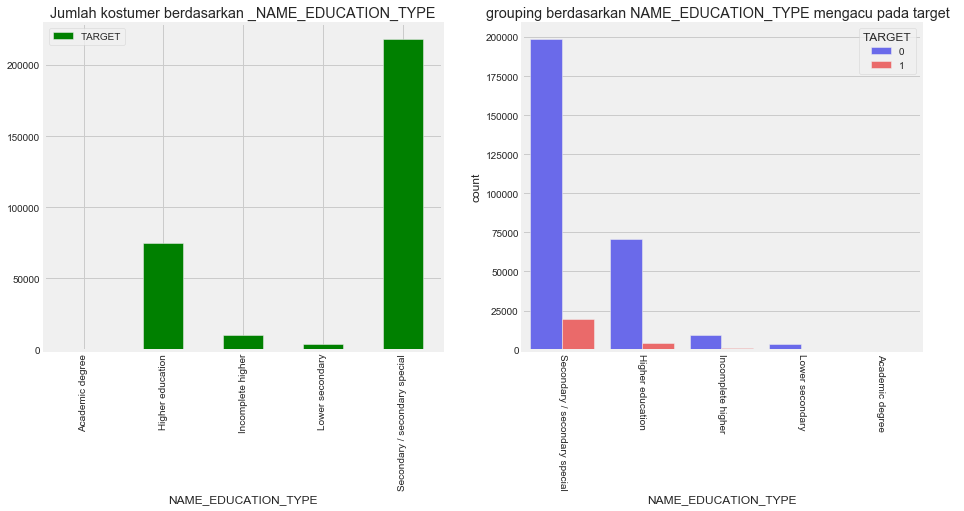

In [61]:
plot(application_train,'NAME_EDUCATION_TYPE','TARGET')

penjelasan: costumer terbanyak ada di level secondary/special , tetapi terdua kebanyak ada di higher education . banyak dari secondary special tidak bisa membayar loan atau memiliki kesulitan

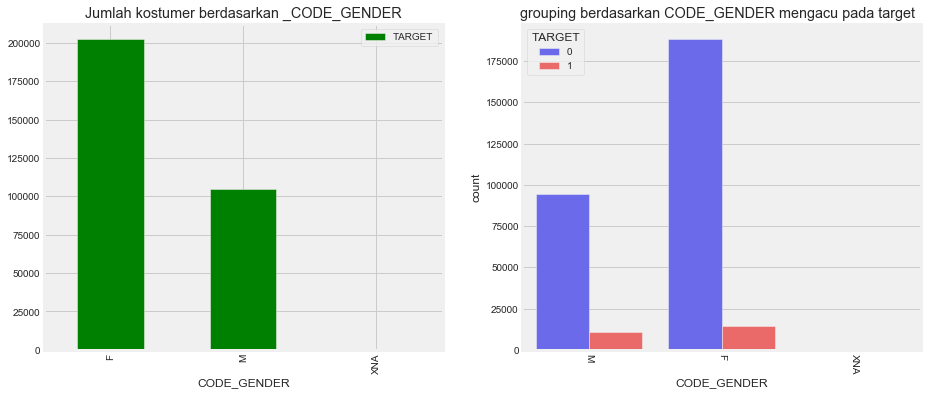

In [62]:
plot(application_train,'CODE_GENDER','TARGET')

penjelasan : costumer terbanyak ada di perempuan . Tetapi kalau dibandingkan dengan rasio , jumlah pria yang memiliki dificulty hampir sama dengan rasio pada wanita padahal jumlah peminjam lebih banyak wanita

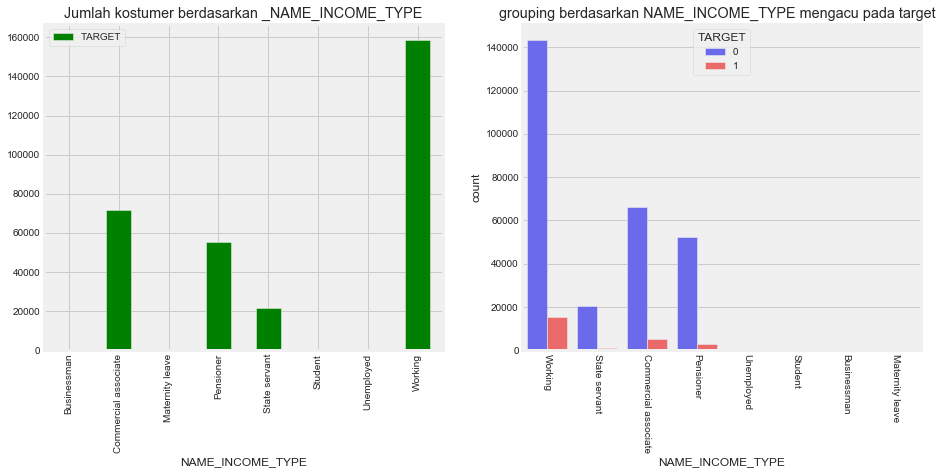

In [63]:
plot(application_train,'NAME_INCOME_TYPE','TARGET')

penjelasan : peminjam paling banyak dari kalangan pekerja , dan jumlah paling banyak memiliki dificulites juga ada dikalangan pekerja diikuti oleh commercial assosciate dan pensiunan

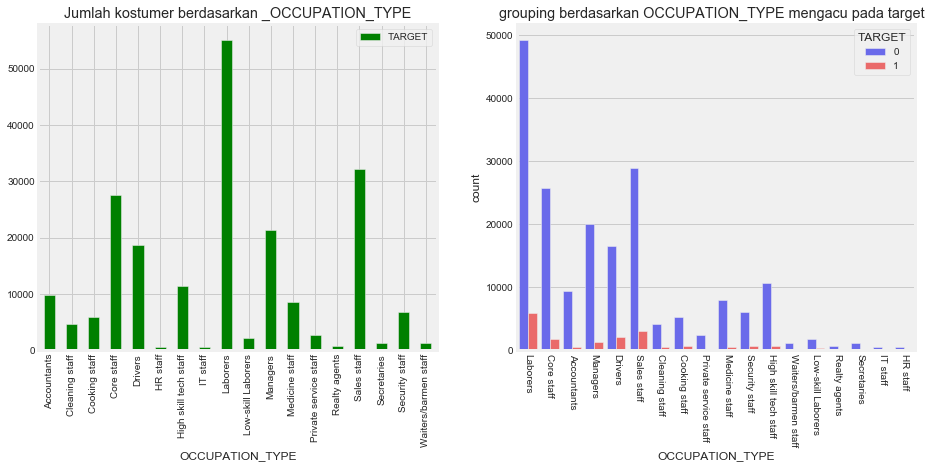

In [64]:
plot(application_train,'OCCUPATION_TYPE','TARGET')

penjelasan : jumlah peminjam dari kelas buruh paling banyak. dan mereka juga memiliki kesulitan tertinggi. Sedangkan jumlah terendah peminjam ada di HR staff.

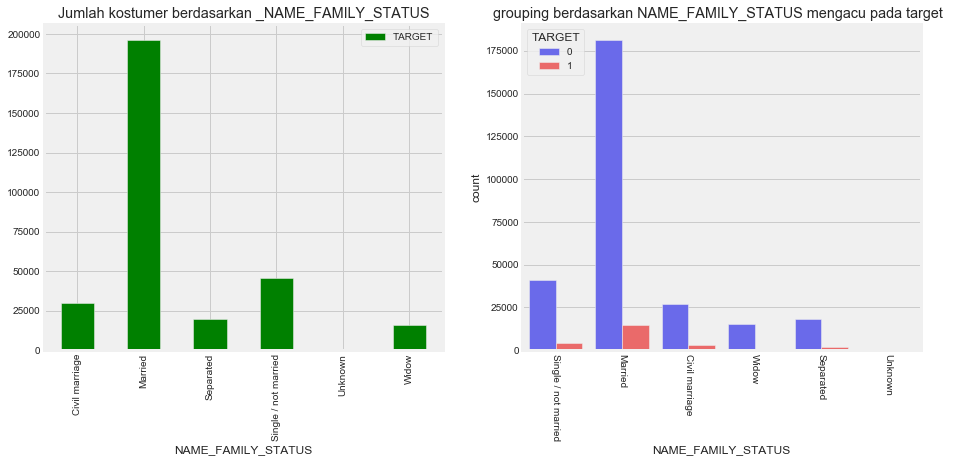

In [65]:
plot(application_train,'NAME_FAMILY_STATUS','TARGET')

penjelasan : jumlah peminjam terbanyak dari kalangan yang sudah berkeluarga begitu juga jumlah tertinggi dalam membayar kembali pinjaman

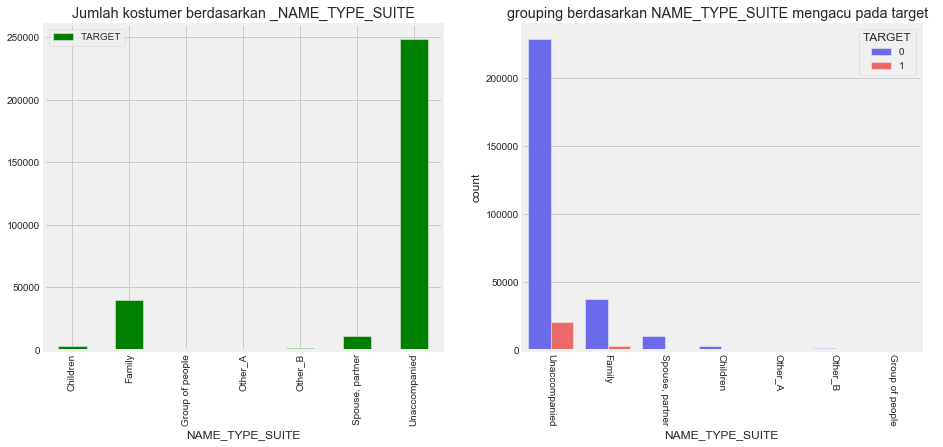

In [66]:
plot(application_train,'NAME_TYPE_SUITE','TARGET')

Penjelasan : kebanyakan peminjam mengajukan pinjaman sendirian . Yang kedua terbanyak dengan keluarga. Yang pinjam sendirian memiliki kesulitan terbanyak dalam mengembalikan pinjaman

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

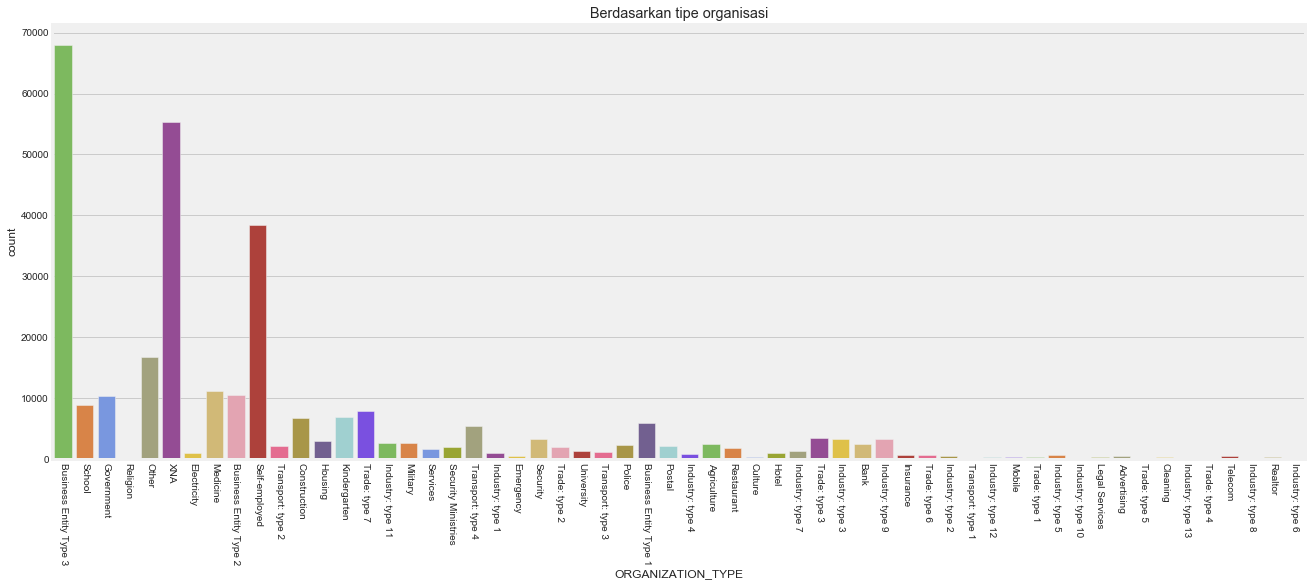

In [67]:
f, ax = plt.subplots(figsize=(20, 8))

color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='ORGANIZATION_TYPE', data=application_train, palette=color_types).set_title('Berdasarkan tipe organisasi');
 
# Rotate x-labels
plt.xticks(rotation=-90)

Text(0.5, 1.0, 'yang memiliki kesulitan dalam membayar berdasarkan tipe organisasi')

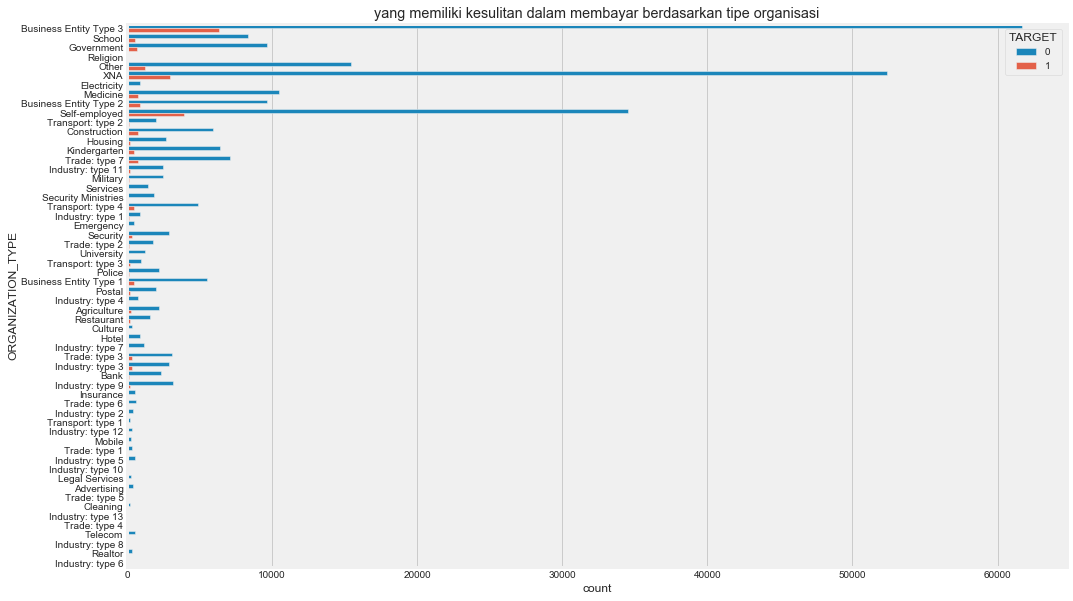

In [68]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="ORGANIZATION_TYPE", hue='TARGET', 
              data=application_train).set_title('yang memiliki kesulitan dalam membayar berdasarkan tipe organisasi')

Penjelasan : Business entitiy type 3 memiliki grade terbanyak dan juga memiliki kesulitan terbanyak dalam mengembalikan dana. Kedua terbanyak ada di wirausahawan meskipun XNA memiliki jumlah peminjam terbanyak

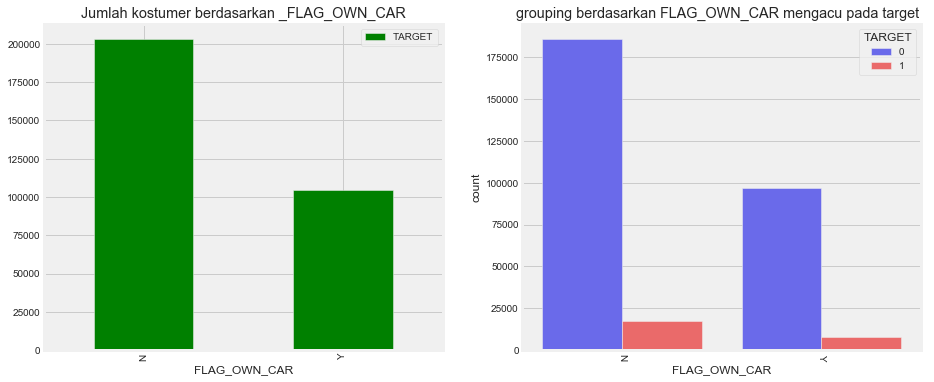

In [69]:
plot(application_train,'FLAG_OWN_CAR','TARGET')

Penjelasan : Mereka yang memiliki mobil meiliki rasio yg lebih kecil berdasarkan tingkat kesulitan dalam pengembalian dana 


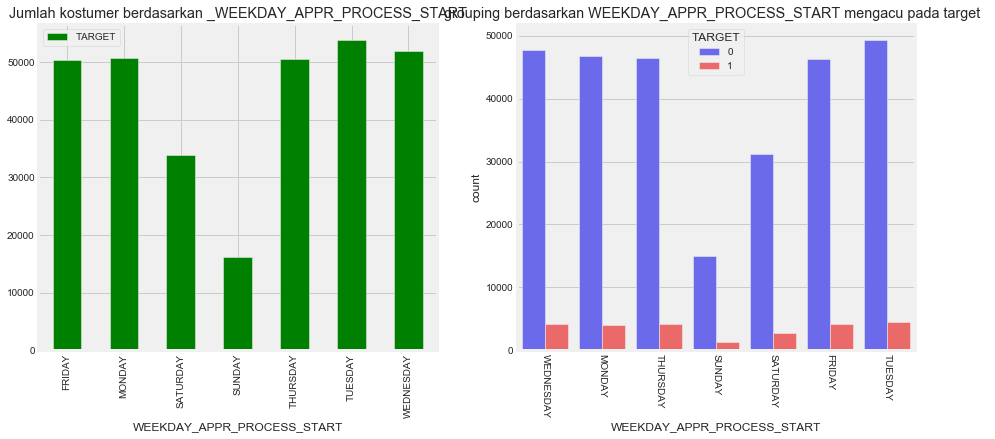

In [70]:
plot(application_train,'WEEKDAY_APPR_PROCESS_START','TARGET')

Penjelasan : peminjam jarang di minggu dan sabtu . Palingbanyak meminjam dihari selasa . Dan mereka yang minjam di hari selasa memilki tingkat kesulitan dalam pengembalian dana terbanyak

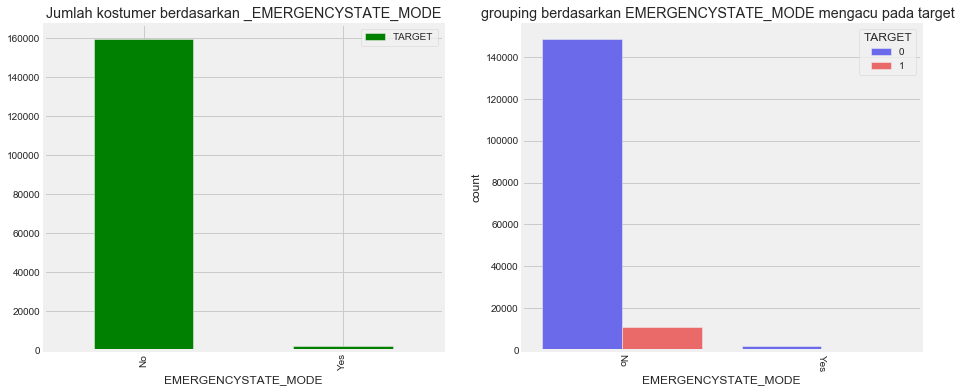

In [71]:
plot(application_train,'EMERGENCYSTATE_MODE','TARGET')

Penjelasan : peminjam terbanyak tidak dalam keadaan terdesak , dan mereka yang tidak dalam keadaan terdesak cenderung memiliki kesulitan dalam mengembalikan dana lebih banyak

Text(0.5, 1.0, 'Yang memiliki kesulitan berdasarkan jumlah anak , biru untuk yang mengalami kesulitan')

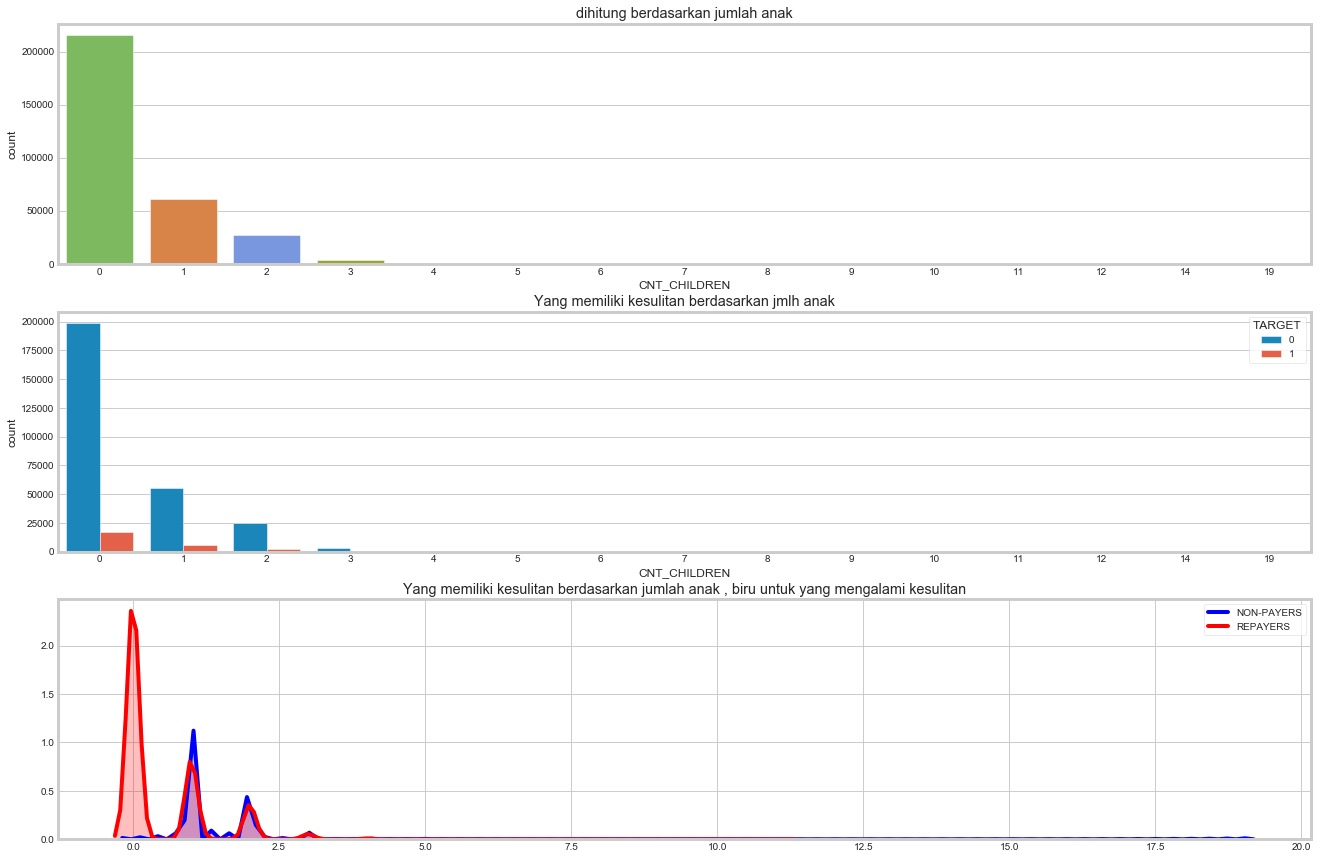

In [72]:
sns.set_style('whitegrid')
f, ax = plt.subplots(3,1,figsize=(20,15))

# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='CNT_CHILDREN', data=application_train, ax=ax[0],palette=color_types).set_title('dihitung berdasarkan jumlah anak');
sns.countplot("CNT_CHILDREN", hue='TARGET', 
              data=application_train,ax=ax[1]).set_title('Yang memiliki kesulitan berdasarkan jmlh anak')
ax[2]=sns.kdeplot(application_train.loc[(application_train['TARGET'] == 0),'CNT_CHILDREN'] , color='b',shade=True,label='NON-PAYERS')
ax[2]=sns.kdeplot(application_train.loc[(application_train['TARGET'] == 1),'CNT_CHILDREN'] , color='r',shade=True, label='REPAYERS')
ax[2].set_title('Yang memiliki kesulitan berdasarkan jumlah anak , biru untuk yang mengalami kesulitan')

dari data diatas peminjam terbanyak adalah yang tidak memiliki anak dan tingkat kesulitan terbanyak ada di data dengan jumlah anak 0

Text(0.5, 1.0, 'customer Amount Annual income Distribution')

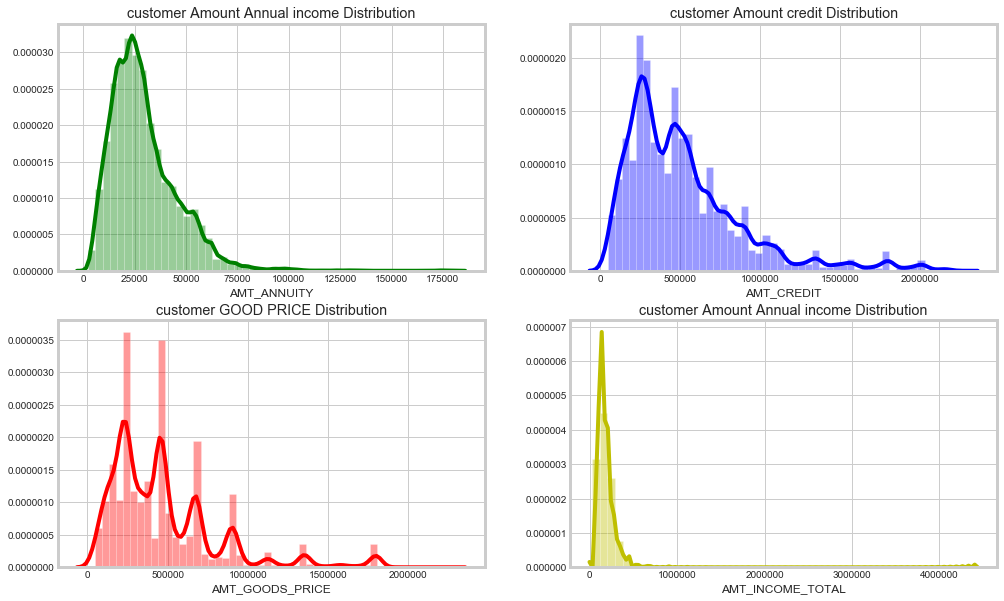

In [73]:
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph amt annutiy Satisfaction
sns.distplot(application_test.AMT_ANNUITY.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('customer Amount Annual income Distribution')


# Graph amt credit Evaluation
sns.distplot(application_test.AMT_CREDIT.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('customer Amount credit Distribution')

# Graph anaual GOOD PRICE  
sns.distplot(application_test.AMT_GOODS_PRICE.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('customer GOOD PRICE Distribution')


sns.distplot(application_test.AMT_INCOME_TOTAL.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('customer Amount Annual income Distribution')

Penjelasan : grafik diatas melihat distribusi data. Grafik pertama menunjukan distribusi tunjangan pinjaman dari 0 hingga 75rb, grafik ke dua menunjunkan jumlah loan yang diberikan terdistribusi hingga 2jt di terendah. 

grafik ke tiga menunjukan Jumlah kredit dari pinjaman , dan grafik terakhir menunjukan total pendapatan dari client ada dibawah 1juta

Text(0.5, 1.0, 'customer Days of Registration Distribution')

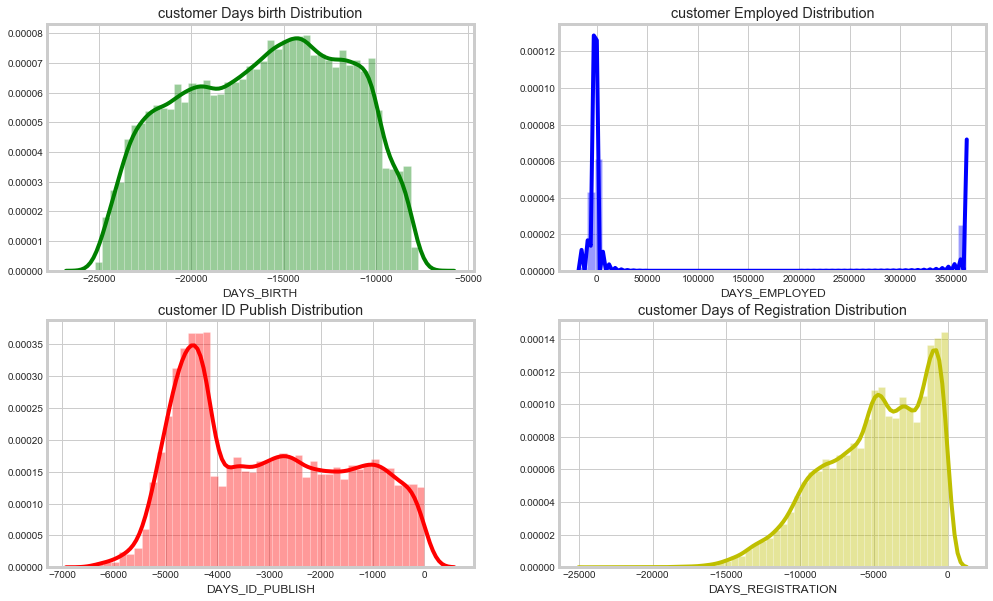

In [74]:
sns.set_style('whitegrid')
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

# Graph amt annutiy Satisfaction
sns.distplot(application_test.DAYS_BIRTH.dropna(), kde=True, color="g", ax=ax[0,0]).set_title('customer Days birth Distribution')

sns.distplot(application_test.DAYS_EMPLOYED.dropna(), kde=True, color="b", ax=ax[0,1]).set_title('customer Employed Distribution')

sns.distplot(application_test.DAYS_ID_PUBLISH.dropna(), kde=True, color="r", ax=ax[1,0]).set_title('customer ID Publish Distribution')


sns.distplot(application_test.DAYS_REGISTRATION.dropna(), kde=True, color="y", ax=ax[1,1]).set_title('customer Days of Registration Distribution')

Penjelasan : grafik hijau distribusi hari dia lahir , grafik biru lama bekerja(pengutang antara belum lama bekerja atau telah lama bekerja) , grafik merah distribusi perubahan ID semenjak registrasi, grafik kuning distribusi registrasi dari peminjam

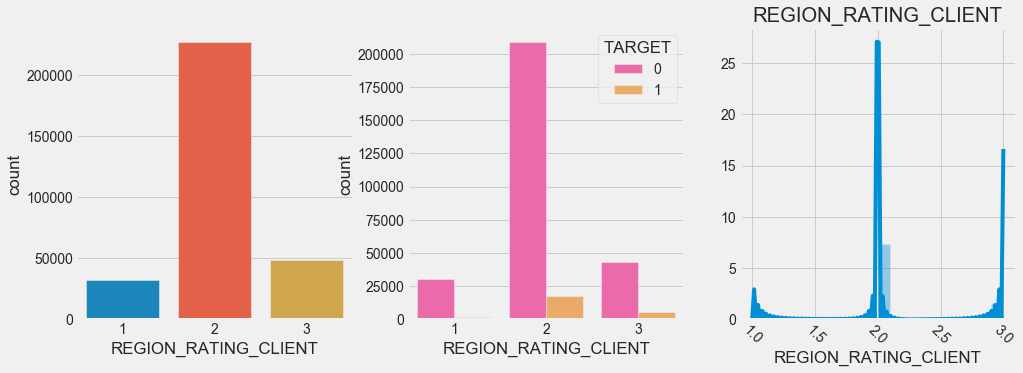

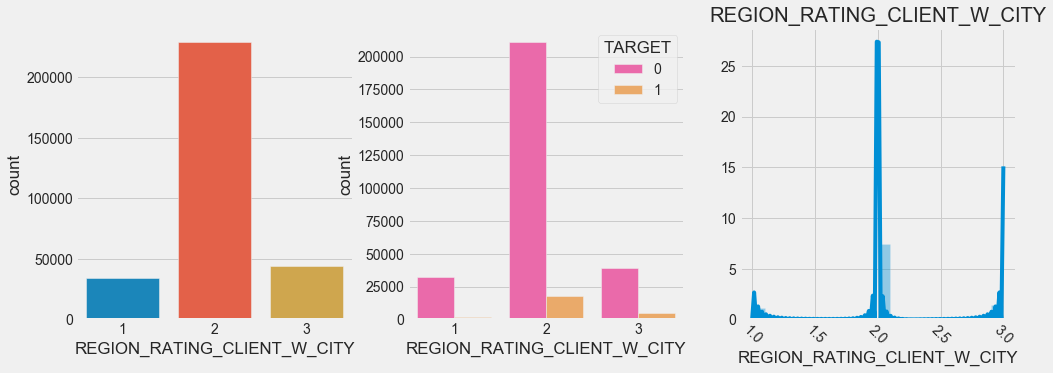

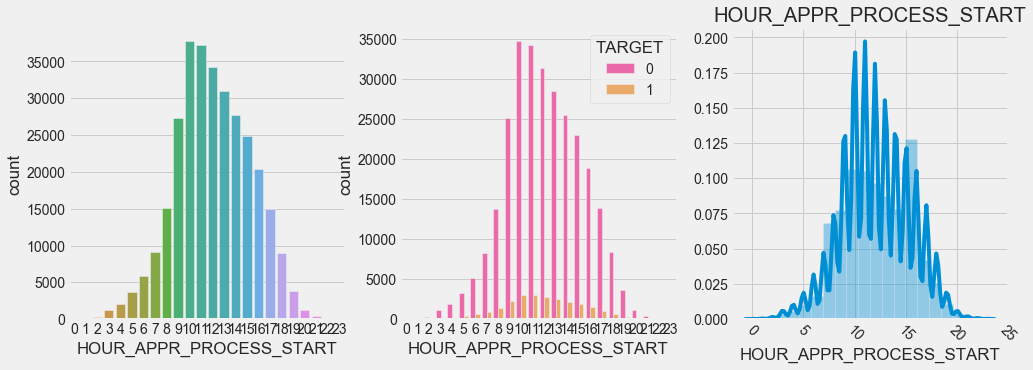

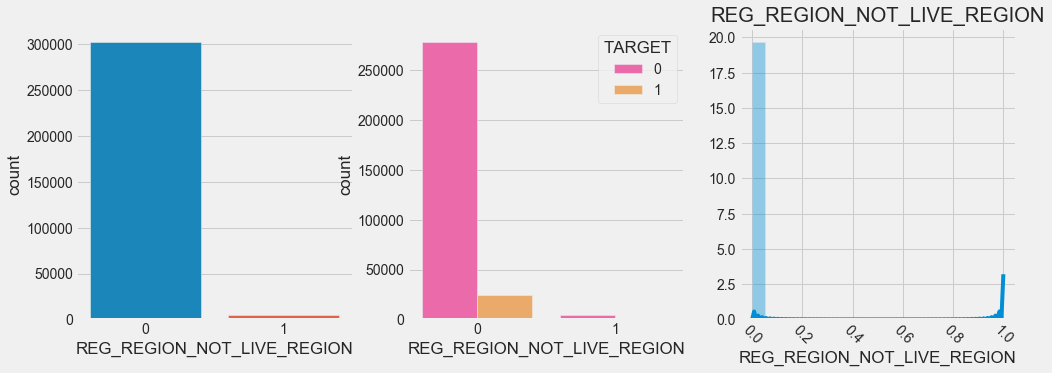

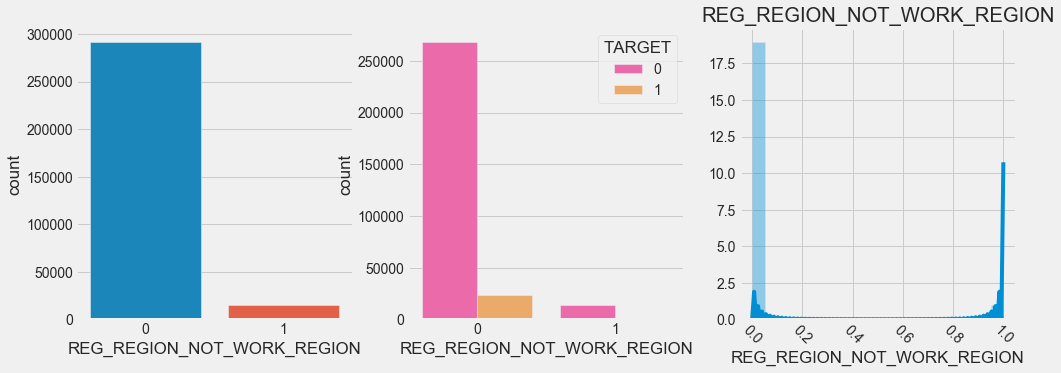

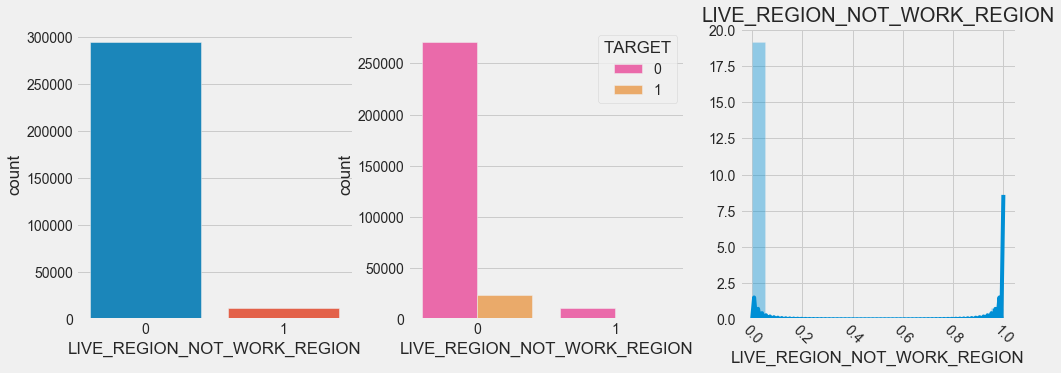

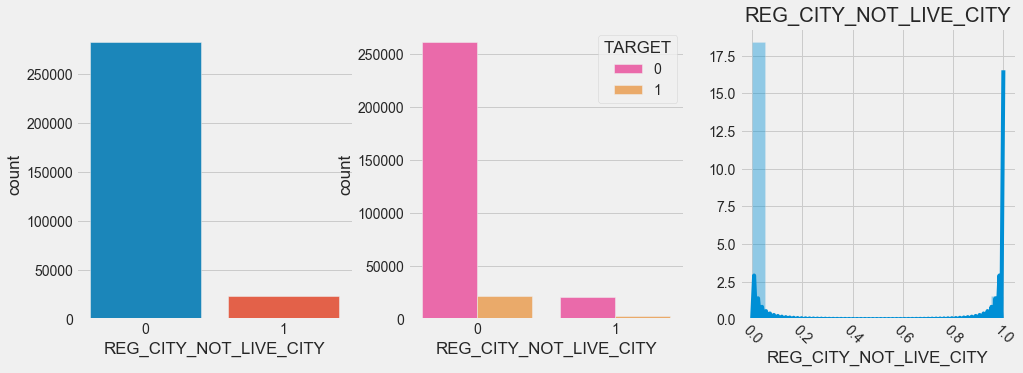

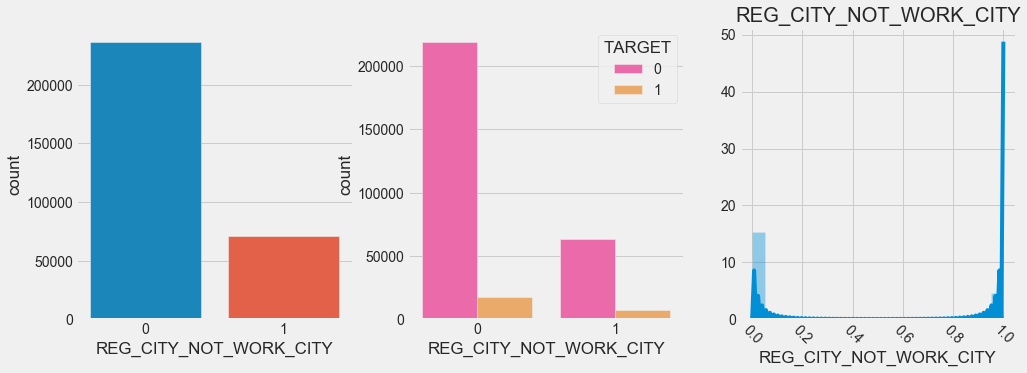

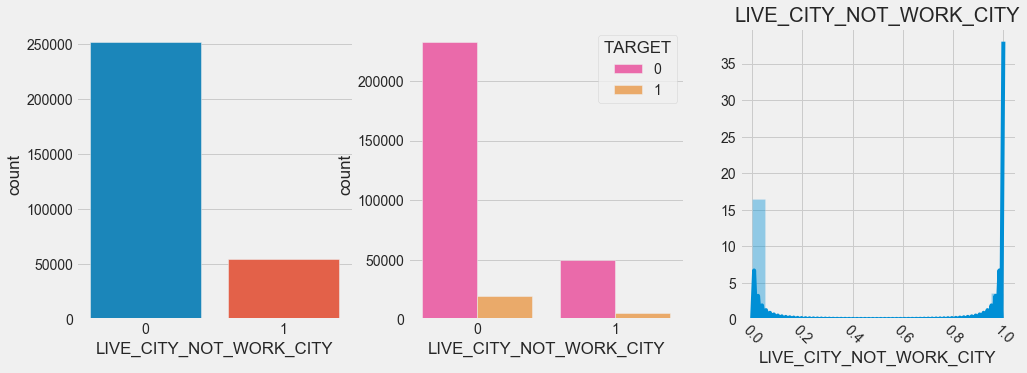

In [124]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

visual_dat= ['REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


for i in visual_dat:
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    sns.countplot(application_train[i])
    plt.subplot(1,3,2)
    sns.countplot(application_train[i],hue=application_train['TARGET'],palette="spring")
    plt.subplot(1,3,3)
    sns.distplot(application_train[i],bins= 20) 
    plt.title(i)
    plt.xticks(rotation=-45)
    plt.show()
    

dari data diatas dapat diambil kesimpulan paling banyak dari region 2 untuk peminjam,baik dengan/tanpa city.

grafik selanjutnya menunjukan kalau kebanyakan peminjam meminjam di sekitar jam 12 
bisa disimpulkan juga banyak data yang memiliki kesamaan dengan work address

tetapi banyak data yang berbeda pada city level untuk kontak dan permanent address

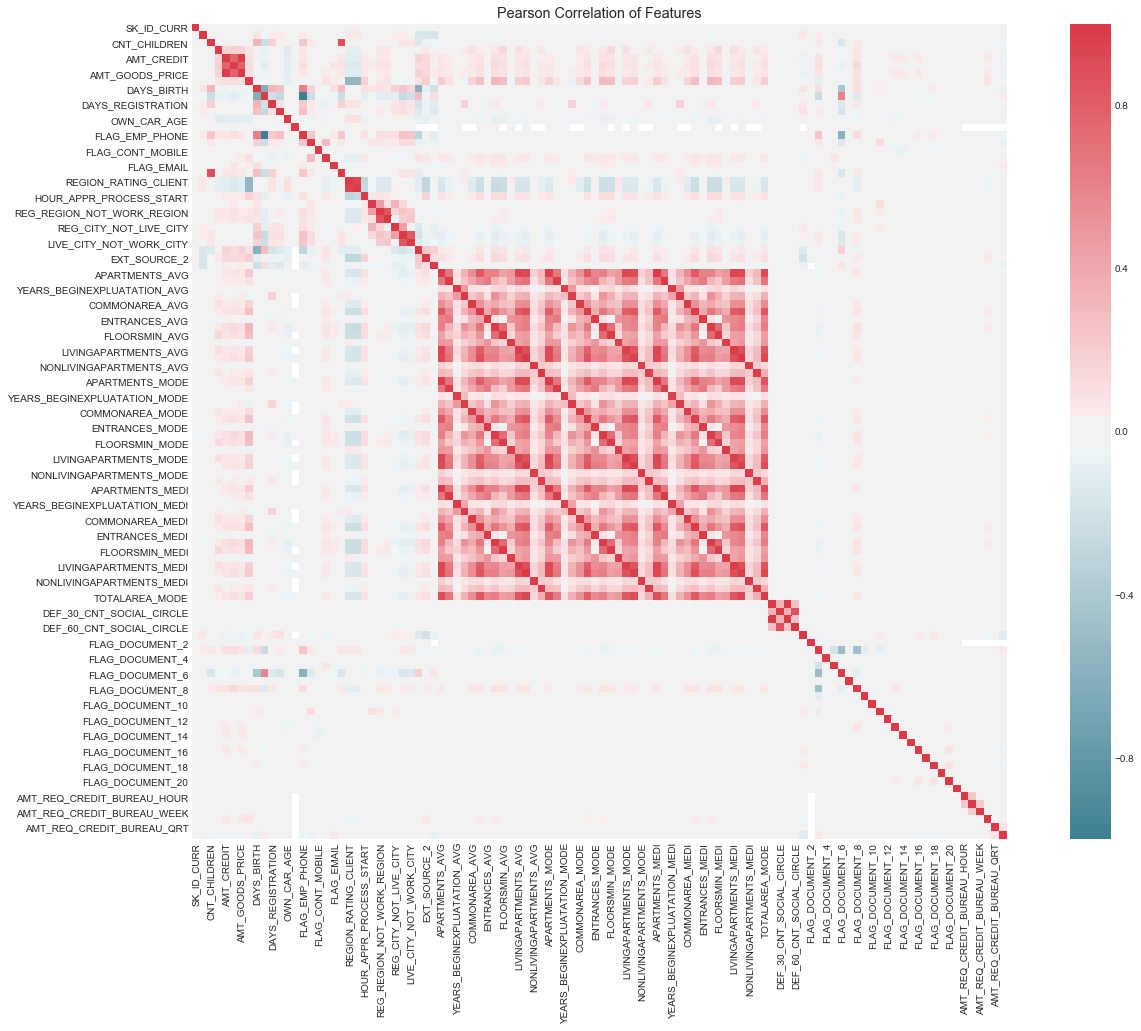

In [76]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20,15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        #cbar_kws={'shrink':.9 }, 
        #ax=ax,
        #annot=True, 
        #linewidths=0.1,vmax=1.0, linecolor='white',
        #annot_kws={'fontsize':16}
    )
    
    plt.title('Pearson Correlation of Features')

correlation_heatmap(application_train)

fitur2 yang memiliki korelasi tertinggi ada pada di rentang Average

Text(0.5, 1.0, 'Count Distribution')

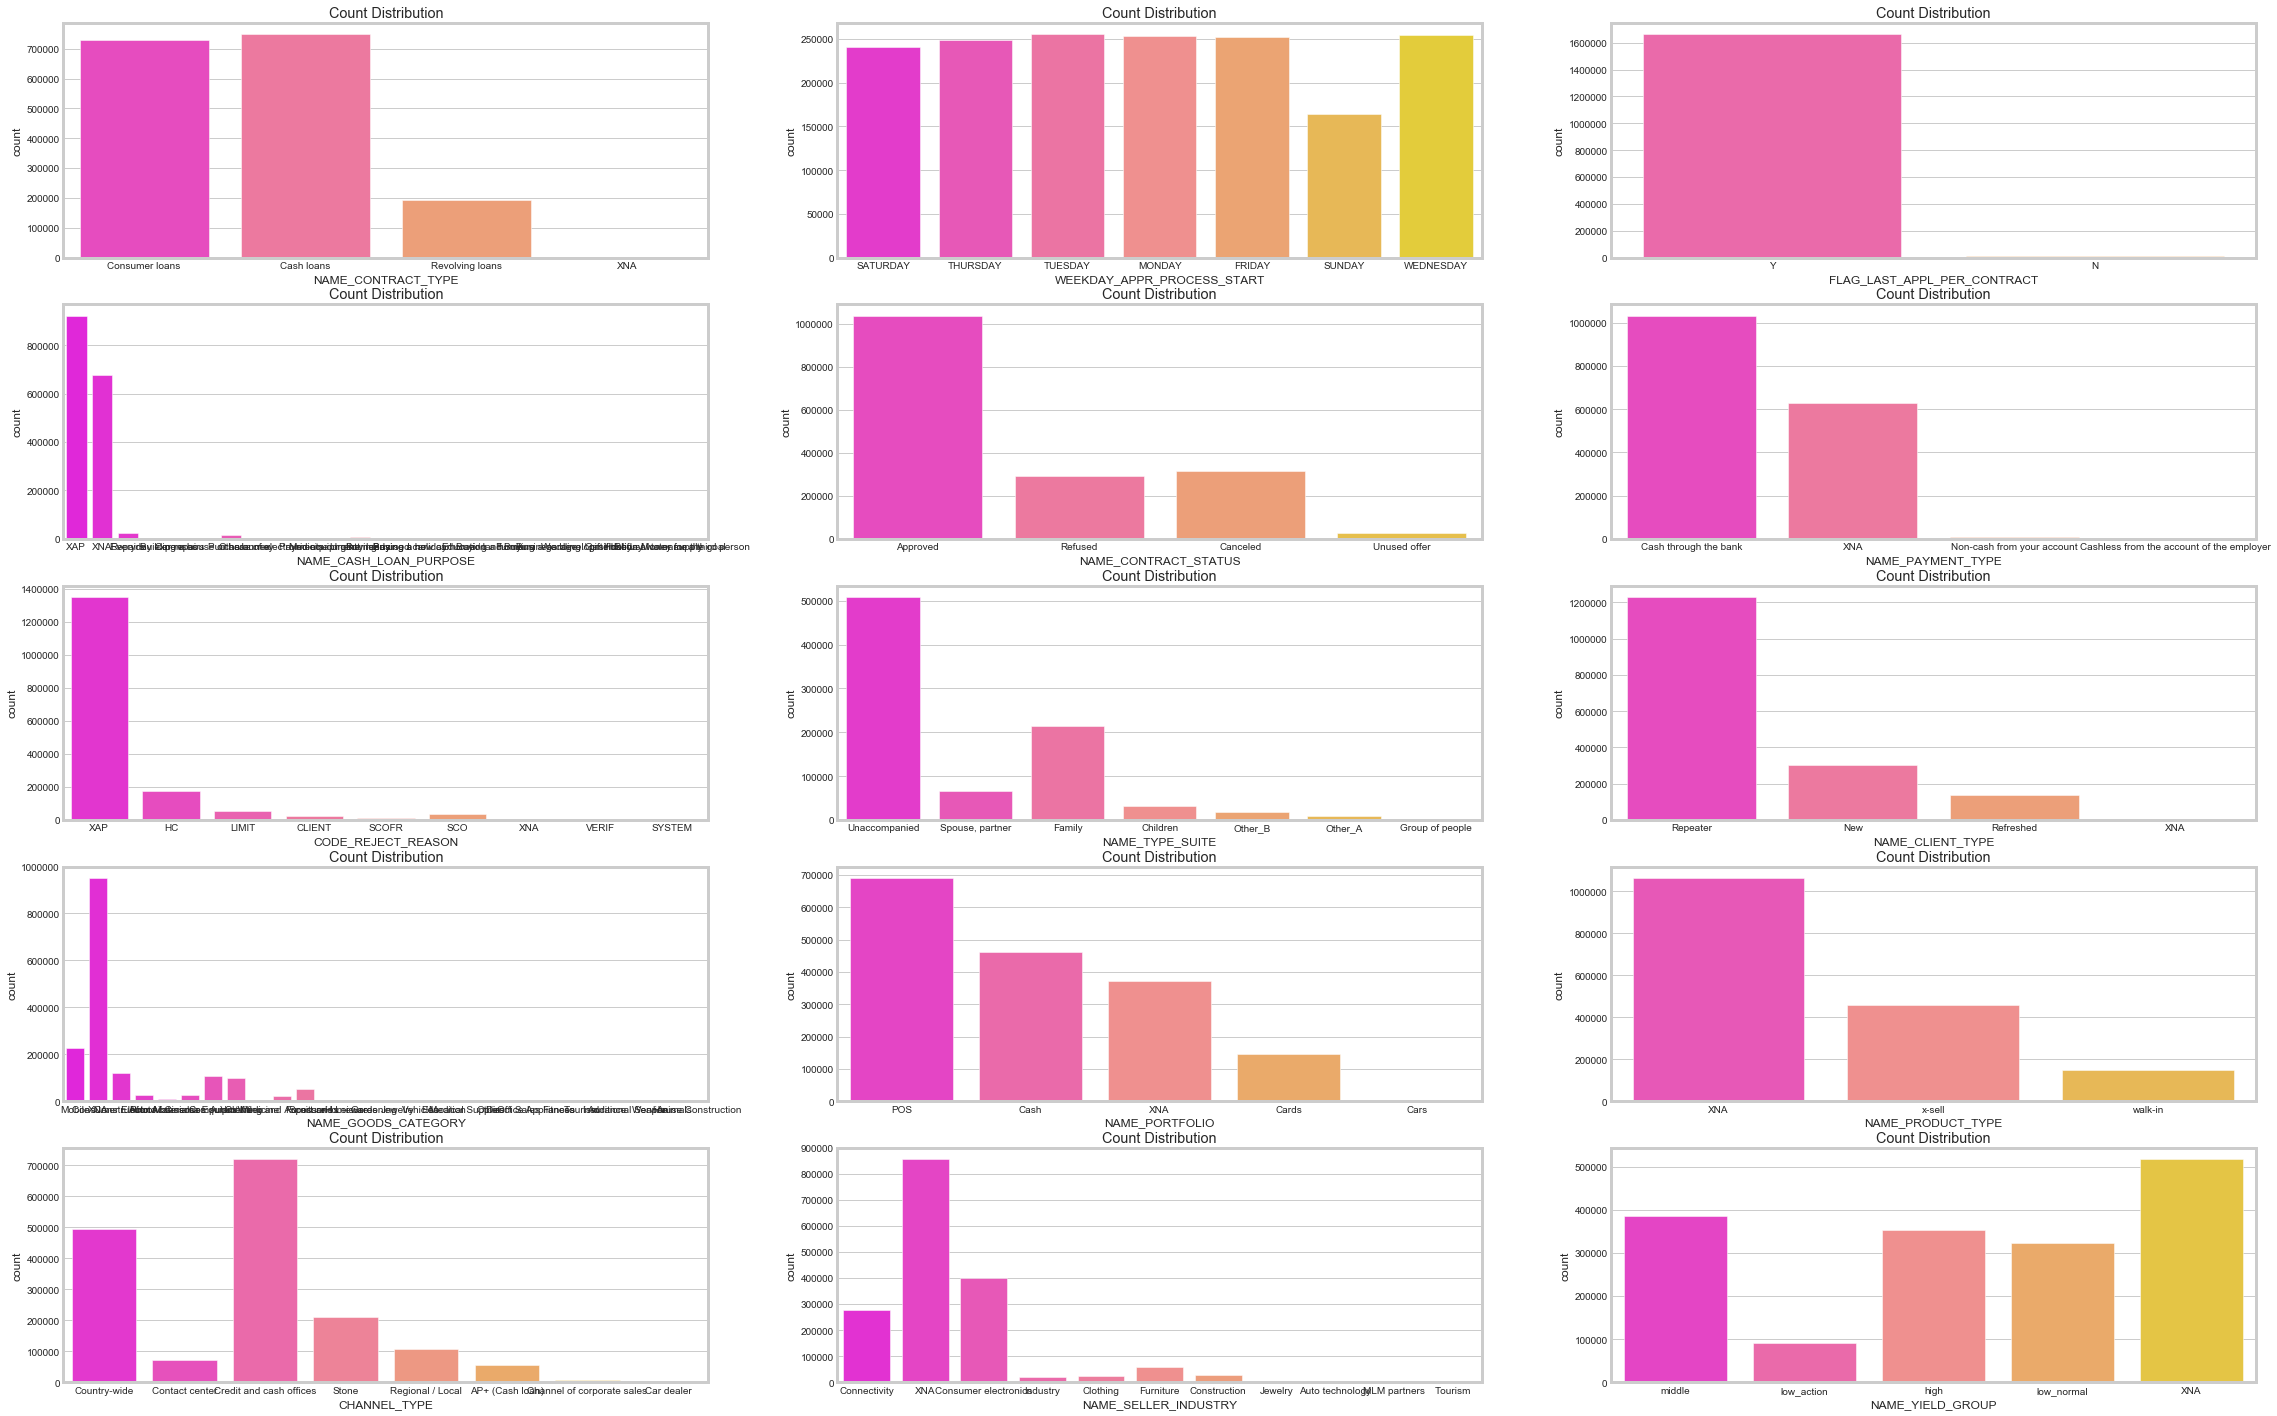

In [77]:
f, ax = plt.subplots(5,3,figsize=(35,25))

 

sns.countplot(previous_application.NAME_CONTRACT_TYPE.dropna(), palette='spring', 
             ax=ax[0,0]).set_title('Count Distribution')



sns.countplot(previous_application.WEEKDAY_APPR_PROCESS_START.dropna(), palette='spring', 
             ax=ax[0,1]).set_title('Count Distribution')



sns.countplot(previous_application.FLAG_LAST_APPL_PER_CONTRACT.dropna(), palette='spring', 
             ax=ax[0,2]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_CASH_LOAN_PURPOSE.dropna(), palette='spring', 
             ax=ax[1,0]).set_title('Count Distribution')



 
sns.countplot(previous_application.NAME_CONTRACT_STATUS.dropna(), palette='spring', 
             ax=ax[1,1]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_PAYMENT_TYPE.dropna(), palette='spring', 
             ax=ax[1,2]).set_title('Count Distribution')



sns.countplot(previous_application.CODE_REJECT_REASON.dropna(), palette='spring', 
             ax=ax[2,0]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_TYPE_SUITE.dropna(), palette='spring', 
             ax=ax[2,1]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_CLIENT_TYPE.dropna(), palette='spring', 
             ax=ax[2,2]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_GOODS_CATEGORY.dropna(), palette='spring', 
             ax=ax[3,0]).set_title('Count Distribution')


sns.countplot(previous_application.NAME_PORTFOLIO.dropna(), palette='spring', 
             ax=ax[3,1]).set_title('Count Distribution')


sns.countplot(previous_application.NAME_PRODUCT_TYPE.dropna(), palette='spring', 
             ax=ax[3,2]).set_title('Count Distribution')



sns.countplot(previous_application.CHANNEL_TYPE.dropna(), palette='spring', 
             ax=ax[4,0]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_SELLER_INDUSTRY.dropna(), palette='spring', 
             ax=ax[4,1]).set_title('Count Distribution')



sns.countplot(previous_application.NAME_YIELD_GROUP.dropna(), palette='spring', 
             ax=ax[4,2]).set_title('Count Distribution')




Penjelasan: melakukan simpel distribution untuk application data set dan melihat data mana yang paling berpengaruh

Text(0.5, 1.0, 'count based on status type')

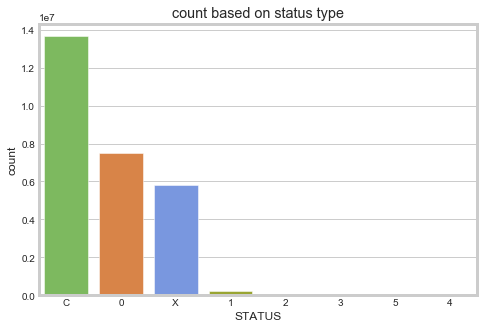

In [78]:
f, ax = plt.subplots(figsize=(7,5))

# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='STATUS', data=bureau_balance,palette=color_types).set_title('count based on status type')

Penjelasan: melihat jumlah status terbanyak di bureau , yang terbanyak adalah c 0 dan x

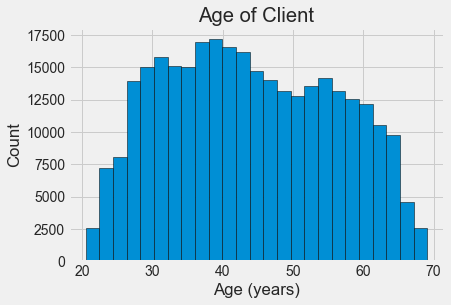

In [79]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(application_train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

penjelasan: distribusi umur dari peminjam

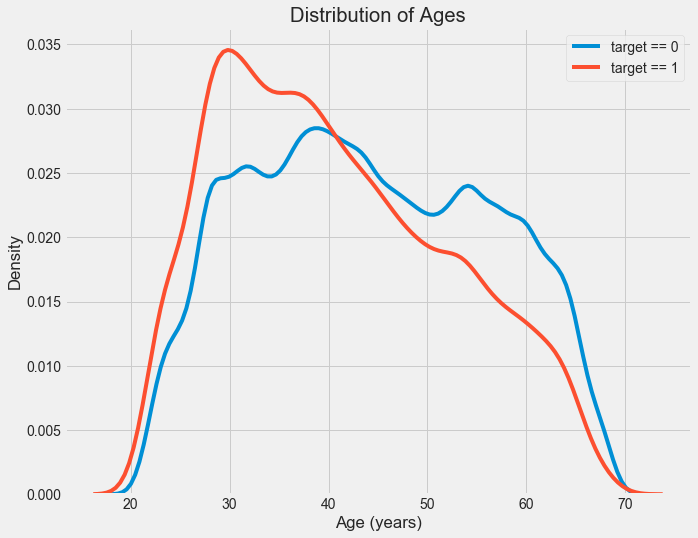

In [80]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

bisadilihat dari distribusi umur mana yang bermasalah banyak diumur 30an 

c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


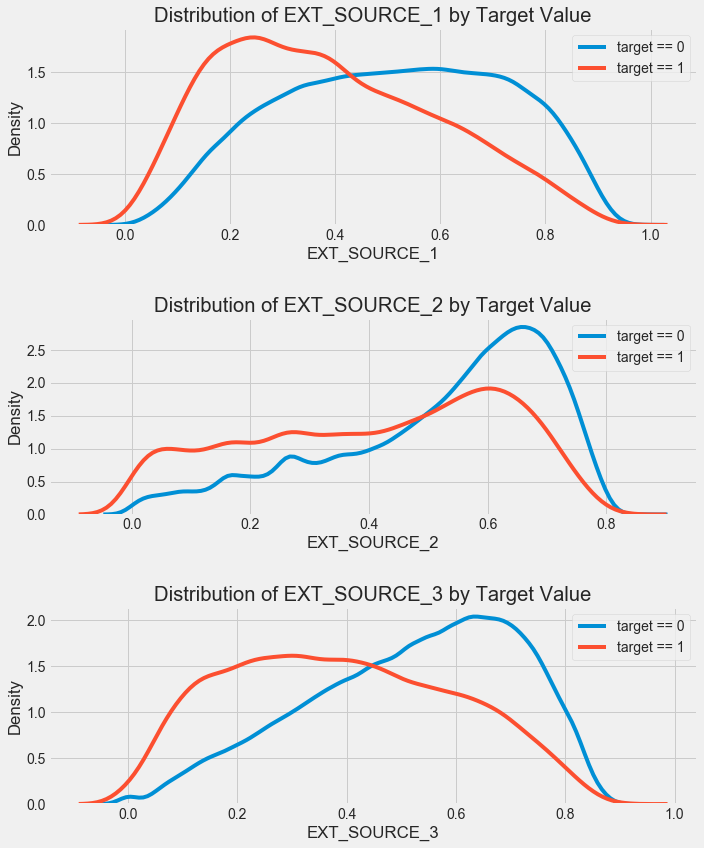

In [81]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
    

perbedaan mencolok di source3. fitur diatas menunjukan relationship terhadap payment

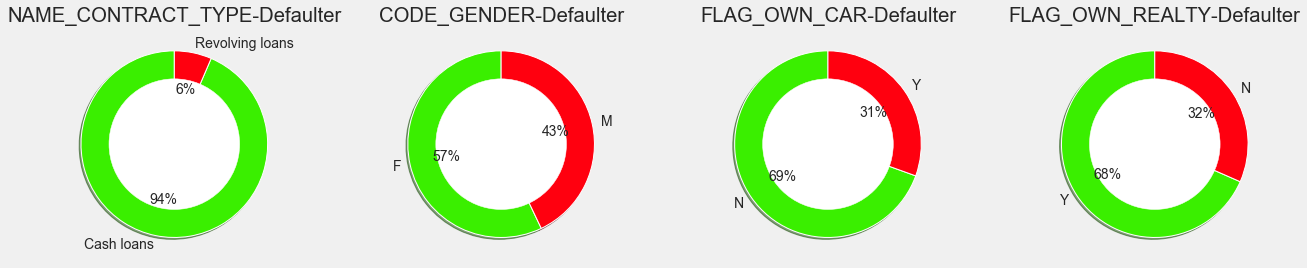

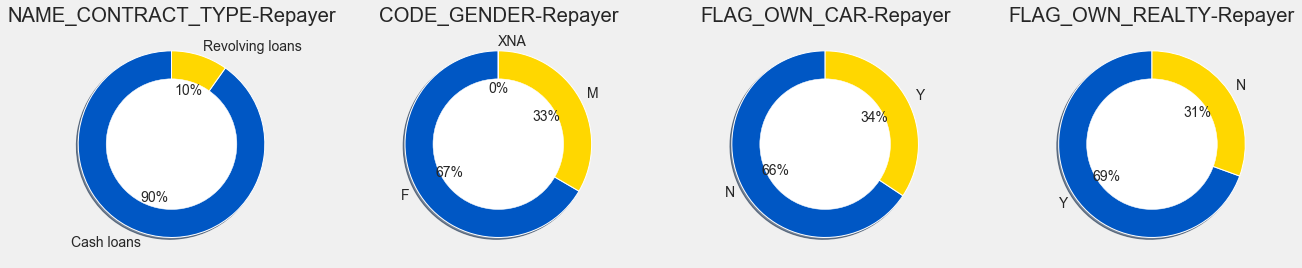

In [82]:
import itertools

default = application_train[application_train["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = application_train[application_train["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(20,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(20,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")

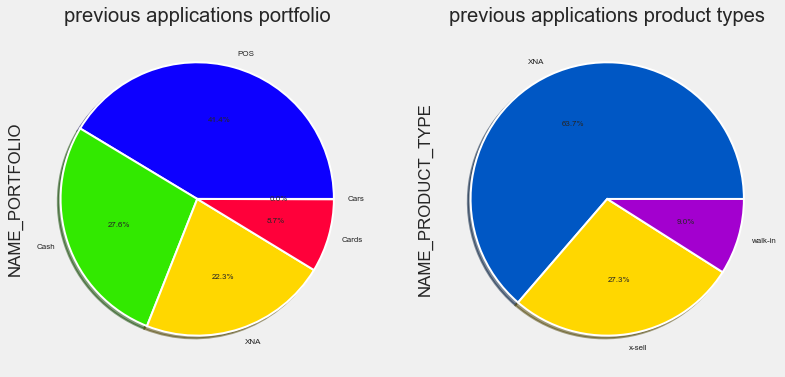

In [83]:
plt.figure(figsize=(12,6))
plt.subplot(121)
previous_application["NAME_PORTFOLIO"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",5),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                               shadow =True)
plt.title("previous applications portfolio")
plt.subplot(122)
previous_application["NAME_PRODUCT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",3),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                                  shadow =True)
plt.title("previous applications product types")
plt.show()


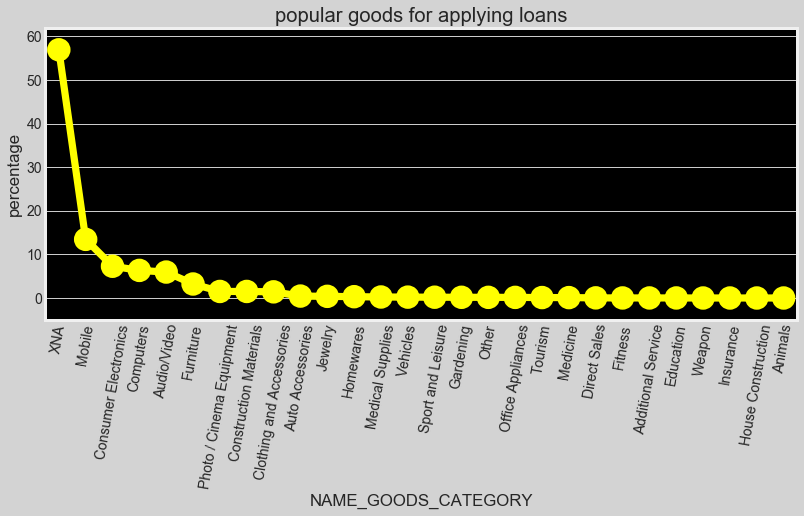

In [84]:
goods = previous_application["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5))
ax = sns.pointplot("index","percentage",data=goods,color="yellow")
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")
ax.set_facecolor("k")
fig.set_facecolor('lightgrey')

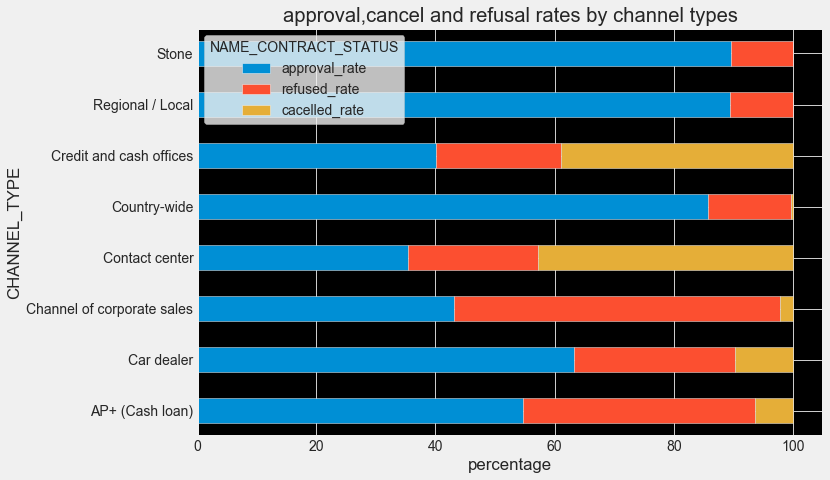

In [122]:
app = pd.crosstab(previous_application["CHANNEL_TYPE"],previous_application["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_facecolor("k")
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()


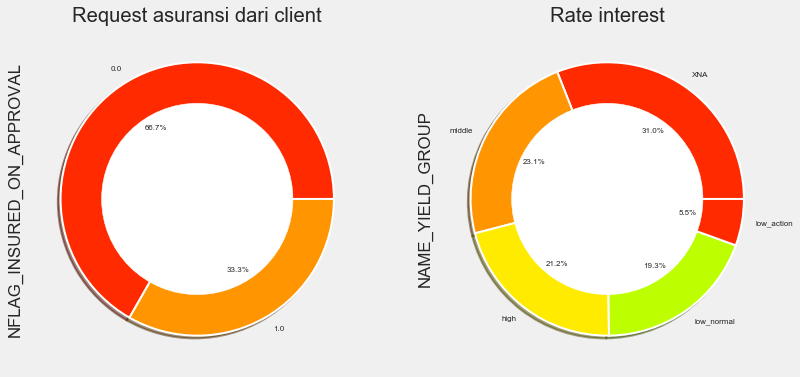

In [111]:
plt.figure(figsize=(12,6))
plt.subplot(121)
previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Request asuransi dari client")

plt.subplot(122)
previous_application["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Rate interest")
plt.show()

# The machine learning model


In [87]:
application_train["type"] = "train"
application_test["type"]  = "test"
#conactenating train & test data
data = pd.concat([application_train,application_test],axis=0)

c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [89]:
data.head(1)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE,HOUR_APPR_PROCESS_START,HOUSETYPE_MODE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,type
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.025,0.0252,0.0369,0.0369,0.0383,0,1.0,M,0.0143,0.0144,0.0144,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.0,0.0,0.0,No,0.069,0.069,0.069,0.083037,0.262949,0.139376,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,Y,1,0,0.0833,0.0833,0.0833,0.125,0.125,0.125,reg oper account,10,block of flats,0.0369,0.0375,0.0377,0,0,0.0202,0.0205,0.022,0.019,0.0193,0.0198,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Laborers,Business Entity Type 3,NaN,0.018801,2,2,0,0,0,0,100002,1.0,0.0149,"Stone, brick",WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341,train


In [90]:
missing_cols = [ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"]

data_new  = data[[i for i in data.columns if i not in missing_cols]] #menghilangkan data2 diatas karna miss 40%

In [93]:
#Separating numberical and categorical columns
obj_dtypes = [i for i in data_new.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in data_new.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [96]:
#MISSING values treatment
amt_cs = ["AMT_ANNUITY","AMT_GOODS_PRICE"]
for i in amt_cs:
    data_new[i] = data_new.groupby("type").transform(lambda x:x.fillna(x.mean())) #jika nan diisi dengan mean
    
enq_cs =['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in enq_cs:
    data_new[i] = data_new[i].fillna(0) #jika nan diisi 0
    
cols = ["DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE",
        "OBS_60_CNT_SOCIAL_CIRCLE","NAME_TYPE_SUITE","CNT_FAM_MEMBERS",
       "DAYS_LAST_PHONE_CHANGE","DAYS_LAST_PHONE_CHANGE"]
for i in cols :
    data_new[i]  = data_new[i].fillna(data_new[i].mode()[0]) #jika nan diisi mode

c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [97]:
#Label encoding semua object 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in obj_dtypes:
    data_new[i] = le.fit_transform(data_new[i]) 

c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [98]:
#one hot encoding for categorical variables
data_new = pd.get_dummies(data=data_new,columns=obj_dtypes)

In [99]:
#splitting new train and test data
application_train_newdf = data_new[data_new["type"] == "train"]
application_test_newdf  = data_new[data_new["type"] == "test"]

In [100]:
#splitting application_train_newdf into train and test
from sklearn.model_selection import train_test_split
train,test = train_test_split(application_train_newdf,test_size=.3,random_state = 123)

train = train.drop(columns="type",axis=1)
test  = test.drop(columns="type",axis=1)

#seperating dependent and independent variables
train_X = train[[i for i in train.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
train_Y = train[["TARGET"]]

test_X  = test[[i for i in test.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
test_Y  = test[["TARGET"]]

In [101]:
# Up-sample Minority Class
from sklearn.utils import resample

#separating majority and minority classes
df_majority = train[train["TARGET"] == 0]
df_minority = train[train["TARGET"] == 1]

#upsample minority data
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples =197969,
                                 random_state=123)

df_upsampled = pd.concat([df_majority,df_minority_upsampled],axis=0)

#splitting dependent and independent variables
df_upsampled_X = df_upsampled[[i for i in df_upsampled.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
df_upsampled_Y = df_upsampled[["TARGET"]]

In [102]:
# Down-sample Majority Class
from sklearn.utils import resample

#separating majority and minority classes
df_majority = train[train["TARGET"] == 0]
df_minority = train[train["TARGET"] == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=17288,
                                   random_state=123)

df_downsampled = pd.concat([df_minority,df_majority_downsampled],axis=0)

#splitting dependent and independent variables

df_downsampled_X = df_downsampled[[i for i in df_downsampled.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
df_downsampled_Y = df_downsampled[["TARGET"]]

In [103]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    ax.set_facecolor("k")

c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy score :  0.5778936414681206
Recall score   :  0.10338469310431928
classification report :
               precision    recall  f1-score   support

         0.0       0.58      0.93      0.72     52664
         1.0       0.54      0.10      0.17     39590

   micro avg       0.58      0.58      0.58     92254
   macro avg       0.56      0.52      0.45     92254
weighted avg       0.56      0.58      0.48     92254



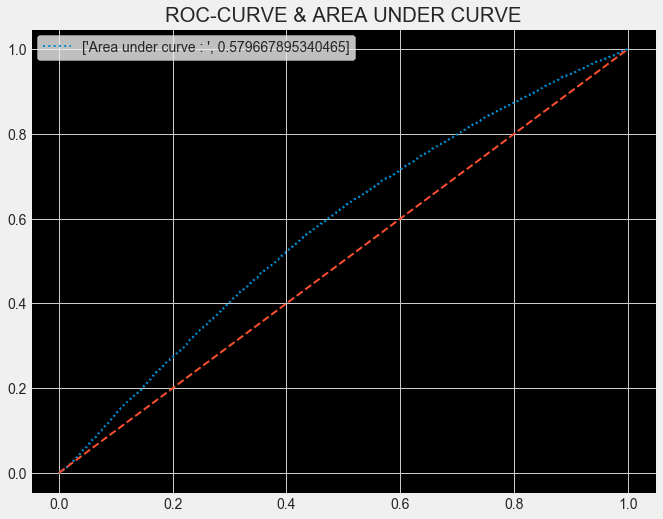

In [104]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
model(logit,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy score :  0.6563184252173347
Recall score   :  0.1178330856076658
classification report :
               precision    recall  f1-score   support

         0.0       0.67      0.94      0.78     60633
         1.0       0.49      0.12      0.19     31621

   micro avg       0.66      0.66      0.66     92254
   macro avg       0.58      0.53      0.49     92254
weighted avg       0.61      0.66      0.58     92254



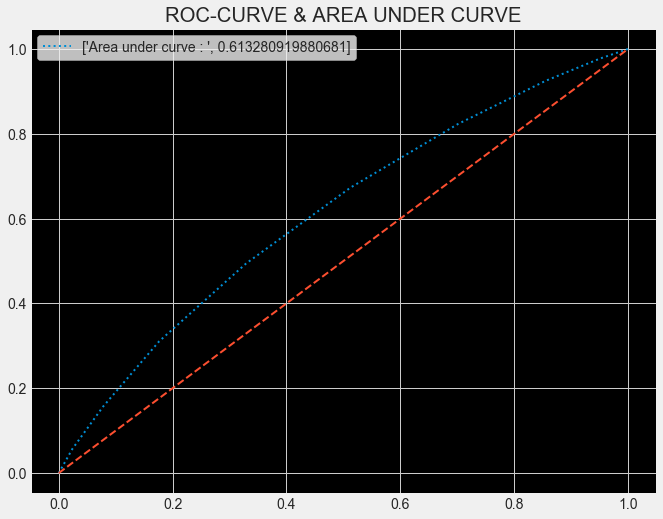

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model(rfc,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy score :  0.5442148849914367
Recall score   :  0.09705065035144665
classification report :
               precision    recall  f1-score   support

         0.0       0.54      0.93      0.69     49431
         1.0       0.55      0.10      0.17     42823

   micro avg       0.54      0.54      0.54     92254
   macro avg       0.55      0.51      0.43     92254
weighted avg       0.55      0.54      0.44     92254



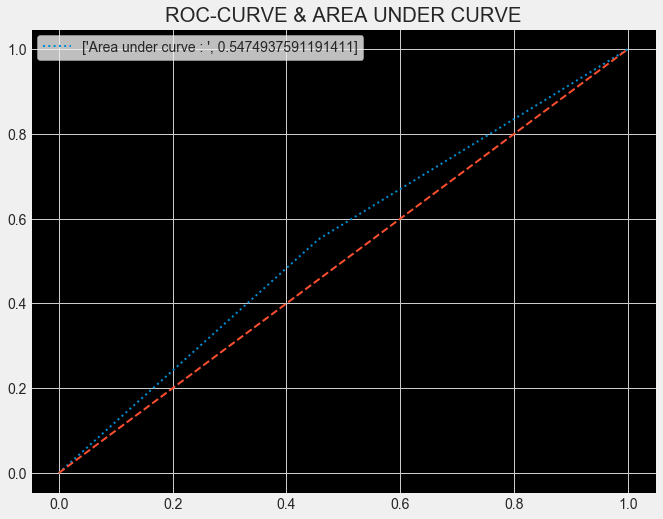

In [106]:

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model(dtc,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy score :  0.8983783900969063
Recall score   :  0.07727690892364306
classification report :
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95     90080
         1.0       0.02      0.08      0.03      2174

   micro avg       0.90      0.90      0.90     92254
   macro avg       0.50      0.50      0.49     92254
weighted avg       0.95      0.90      0.92     92254



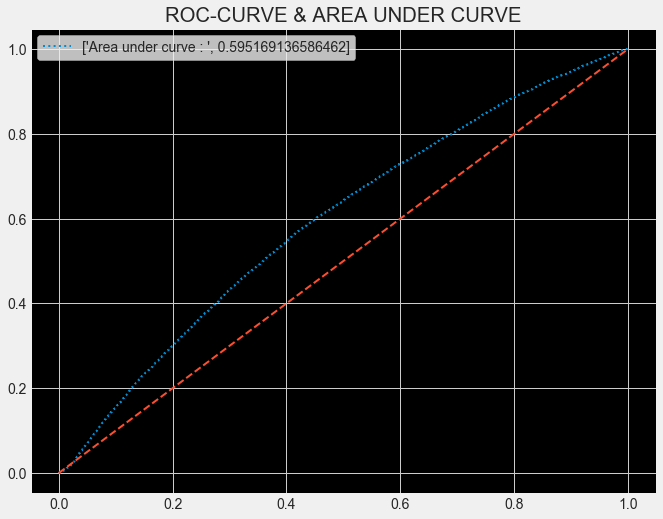

In [107]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model(gnb,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy score :  0.6332625143625209
Recall score   :  0.13302445015072012
classification report :
               precision    recall  f1-score   support

         0.0       0.63      0.95      0.76     56426
         1.0       0.63      0.13      0.22     35828

   micro avg       0.63      0.63      0.63     92254
   macro avg       0.63      0.54      0.49     92254
weighted avg       0.63      0.63      0.55     92254



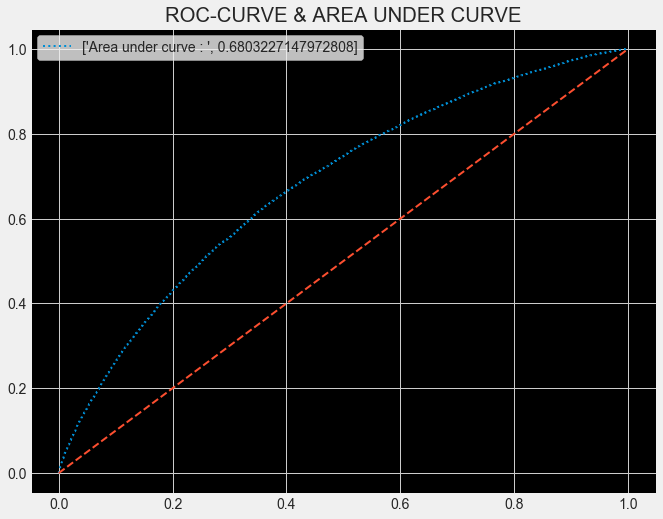

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model(xgb,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Accuracy score :  0.6313655776443298
Recall score   :  0.13227572027894313
classification report :
               precision    recall  f1-score   support

         0.0       0.63      0.95      0.76     56261
         1.0       0.63      0.13      0.22     35993

   micro avg       0.63      0.63      0.63     92254
   macro avg       0.63      0.54      0.49     92254
weighted avg       0.63      0.63      0.55     92254



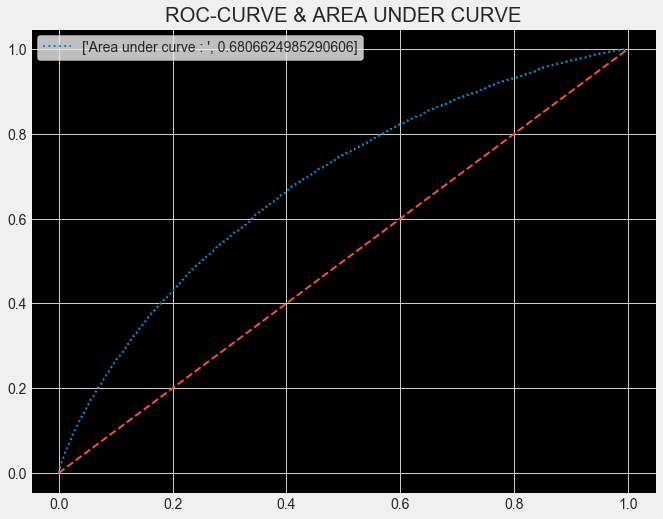

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model(gbc,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

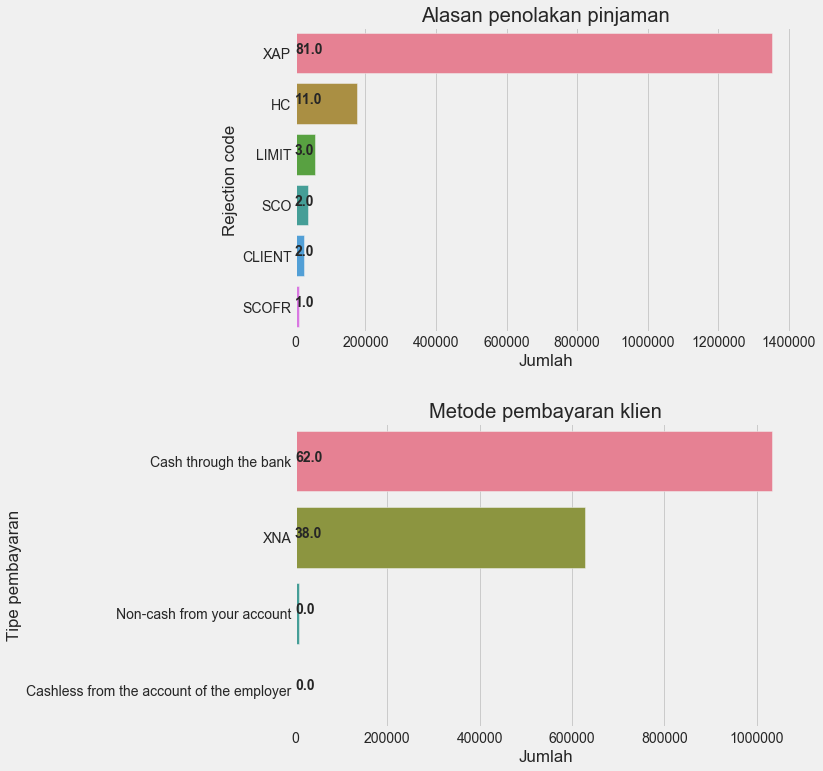

In [115]:
plt.figure(figsize=(8,12))
plt.subplot(211)
rej = previous_application["CODE_REJECT_REASON"].value_counts().reset_index()
ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6],palette="husl")
for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):
    ax.text(.7,i,j,weight="bold")
plt.xlabel("Jumlah")
plt.ylabel("Rejection code")
plt.title("Alasan penolakan pinjaman")

plt.subplot(212)
pay = previous_application["NAME_PAYMENT_TYPE"].value_counts().reset_index()
ax1 = sns.barplot("NAME_PAYMENT_TYPE","index",data=pay,palette="husl")
for i,j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values*100/(pay["NAME_PAYMENT_TYPE"].sum())))):
    ax1.text(.7,i,j,weight="bold")
plt.xlabel("Jumlah")
plt.ylabel("Tipe pembayaran")
plt.title("Metode pembayaran klien")
plt.subplots_adjust(hspace = .3)